In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle


# For EDA

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet  
from nltk.stem import WordNetLemmatizer
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
def preprocess(text):
    text = text.lower()  
    text = text.strip()   
    text = re.sub(r'<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)  
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)  
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)  
    text = re.sub(r'\s+',' ',text)
    wl = WordNetLemmatizer()
    clean_text = []
    for word in text.split():
        if word not in stopwords.words('english'):
            word = wl.lemmatize(word)
            clean_text.append(word)
            
    return " ".join(clean_text) 



In [3]:
def EDA(dataframe, train_df, test_df):
    
    
    print(f" Dataframe of the entire data= \n {dataframe.head}")
    
    print(f" Dataframe of training data= \n {train_df.head}")

    print(f" Dataframe of testing data= \n {test_df.head}")

    
    # Plot for total dataframe
    x = data["Category"].value_counts()  
    sns.barplot(x=x.index, y=x.values)
    plt.xlabel("Category")
    plt.ylabel("Count") 
    plt.title("Value Counts of Categories Total Data")
    plt.show()
    
    # Plot for training data
    x = train_df["Category"].value_counts()
    sns.barplot(x=x.index, y=x.values)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title("Value Counts of Categories Training Data") 
    plt.show()
    
    # Plot for test data
    x = test_df["Category"].value_counts()
    sns.barplot(x=x.index, y=x.values)  
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.title("Value Counts of Categories Test Data")
    plt.show()

    # Check for missing values
    print("Missing Value Count :") 
    print(dataframe.isna().sum())

    # Calculate mean word counts
    dataframe['word_count'] = dataframe['Content'].apply(lambda x: len(str(x).split()))
    
    print("\nMean word count:")
    for cat in dataframe['Category'].unique():
        print(f"{cat}: {dataframe[dataframe['Category']==cat]['word_count'].mean()}") 

In [4]:
def knn_classifier(vectorizer, train_data, test_data):
#     train_data['Content'] = train_data['Content'].apply(preprocess)
#     test_data['Content'] = test_data['Content'].apply(preprocess)

    X_train = vectorizer.fit_transform(train_data['Content'])
    y_train = train_data['Category']

    X_test = vectorizer.transform(test_data['Content'])  # Use transform here
    y_test = test_data['Category']

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    knn_accuracy = accuracy_score(y_test, y_pred)
    knn_precision = precision_score(y_test, y_pred, average='weighted')

    print({'accuracy': knn_accuracy, 'Precision': knn_precision})

    knn_metrics = {
        'model': knn,
        'accuracy': knn_accuracy,
        'precision': knn_precision
    }

    return knn_metrics

In [5]:
def logistic_regression(vectorizer,train_data, test_data):

    # loading dataset 
    # data=pd.read_csv('bbc-news-data.csv', sep='\t', header=None, names=['Category','Filename','Title','Content'])

    # train_data,test_data=train_test_split(data, test_size=0.3, random_state=42)

    
    # vectorizer= TfidfVectorizer(stop_words = 'english')

#     train_data['Content'] = train_data['Content'].apply(preprocess)
#     test_data['Content'] = test_data['Content'].apply(preprocess)

    X_train = vectorizer.fit_transform(train_data['Content'])
    y_train = train_data['Category']

    X_test = vectorizer.transform(test_data['Content'])  # Use transform here
    y_test = test_data['Category']


    
    logistic_regression=LogisticRegression(max_iter=1000)

    logistic_regression.fit(X_train,y_train)

    y_pred=logistic_regression.predict(X_test) 
    

    logistic_regression_accuracy= accuracy_score(y_test, y_pred) 

    logistic_regression_precision= precision_score(y_test, y_pred, average='macro') 
    
    print( {'accuracy' : logistic_regression_accuracy ,  'Precision' : logistic_regression_precision})

    logistic_regression_metrics = {
        'model': logistic_regression,
        'accuracy': logistic_regression_accuracy,
        'precision': logistic_regression_precision
    }
    
    return logistic_regression_metrics

In [6]:
def support_vector_machine(vectorizer,train_data, test_data):

    # loading dataset 
    # data=pd.read_csv('bbc-news-data.csv', sep='\t', header=None, names=['Category','Filename','Title','Content'])

    # training,testing = train_test_split(data, test_size=0.2, random_state=42)
    
    
    # vectorizer= TfidfVectorizer(stop_words = 'english')

#     train_data['Content'] = train_data['Content'].apply(preprocess)
#     test_data['Content'] = test_data['Content'].apply(preprocess)

    X_train = vectorizer.fit_transform(train_data['Content'])
    y_train = train_data['Category']

    X_test = vectorizer.transform(test_data['Content'])  # Use transform here
    y_test = test_data['Category']

    
    svc=SVC(kernel='linear', probability=True)

    svc.fit(X_train,y_train)

    y_pred=svc.predict(X_test) 
    

    svc_accuracy= accuracy_score(y_test, y_pred) 

    svc_precision= precision_score(y_test, y_pred, average='weighted') 

    print({'accuracy': svc_accuracy, 'Precision': svc_precision})

    svc_metrics = {
        'model': svc,
        'accuracy': svc_accuracy,
        'precision': svc_precision
    }
    
    return svc_metrics 

In [7]:
def decision_tree_classifier(vectorizer,train_data, test_data):

    # data = pd.read_csv('bbc-news-data.csv', sep='\t', header=None, names=['Category','Filename','Title','Content'])

    # train_data,test_data = train_test_split(data, test_size=0.1, random_state=42)
    
    
    # vectorizer= TfidfVectorizer(stop_words = 'english')
#     train_data['Content'] = train_data['Content'].apply(preprocess)
#     test_data['Content'] = test_data['Content'].apply(preprocess)

    X_train = vectorizer.fit_transform(train_data['Content'])
    y_train = train_data['Category']

    X_test = vectorizer.transform(test_data['Content'])  # Use transform here
    y_test = test_data['Category']

    
    decision_tree =DecisionTreeClassifier()

    decision_tree.fit(X_train,y_train)

    y_pred=decision_tree.predict(X_test) 
    

    decision_tree_accuracy= accuracy_score(y_test, y_pred) 

    decision_tree_precision= precision_score(y_test, y_pred, average='weighted') 

    decision_tree_results={'accuracy' : decision_tree_accuracy, 'Precision': decision_tree_precision}
    
    print( decision_tree_results )

    decision_tree_metrics = {
        'model': decision_tree,
        'accuracy': decision_tree_accuracy,
        'precision': decision_tree_precision
    }
    
    return decision_tree_metrics

In [8]:
def building_results(vectorizer, train_data, test_data):
    results = {}

    knn_result = knn_classifier(vectorizer, train_data, test_data)
    results['KNN'] = knn_result  # Store the entire result dictionary
    
    logistic_result = logistic_regression(vectorizer,train_data, test_data)
    results['Logistic Regression'] = logistic_result  # Store the entire result dictionary
    
    svm_result = support_vector_machine(vectorizer,train_data, test_data)
    results['Support Vector Machine'] = svm_result  # Store the entire result dictionary
    
    dt_result = decision_tree_classifier(vectorizer,train_data, test_data)
    results['Decision Tree'] = dt_result  # Store the entire result dictionary
    
    return results

In [9]:
def save_best_model(results):
    if results:
        best_model_key = max(results, key=lambda x: results[x]['accuracy'])
        best_model = results[best_model_key]['model']
        
        print(f"Best Model: {best_model_key}")

        with open('best_trained_model.pkl', 'wb') as file:
            pickle.dump(best_model, file)
    else:
        print("No models were trained or an error occurred during training.")

In [10]:
def load_best_model():
    with open('best_trained_model.pkl', 'rb') as file:
        best_trained_model = pickle.load(file)
    return best_trained_model

In [11]:
def user_interaction(best_trained_model, vectorizer, data):
    user_satisfied = False
    updated_data = data.copy()  # Make a copy of the original data frame

    while not user_satisfied:
        try:
            user_input = input("Enter some text: ")
            
            # Check for NaN values and handle them
            if pd.isnull(user_input):
                print("The input contains NaN value. Please enter valid text.")
                continue

            # Fit the vectorizer if it's not already fitted
            if not hasattr(vectorizer, 'vocabulary_'):
                vectorizer.fit(updated_data['Content'])

            # Predict the category
            predicted_category = best_trained_model.predict(vectorizer.transform([user_input]))[0]
            print(f"Predicted category: {predicted_category}")

            is_correct = input("Is this prediction correct? (yes/no): ").lower().strip()
            if is_correct == 'no':
                print(f"You can only select these: {updated_data['Category'].unique()}")
                correct_category = input("Enter the correct category: ")

                new_row = pd.DataFrame({'Content': [user_input], 'Category': [correct_category]})
                new_row['Content'] = new_row['Content'].apply(preprocess)
                # Concatenate new_row to updated_data
                updated_data = pd.concat([updated_data, new_row], ignore_index=True, axis=0)

                # Retrain models with updated data
                training_data, testing_data = train_test_split(updated_data, test_size=0.4, random_state=42)
                results = building_results(vectorizer, training_data, testing_data)
                save_best_model(results)

                # Load the updated best trained model
                best_trained_model = load_best_model()

            else:
                user_satisfied = True

        except Exception as e:
            print(f"An error occurred: {str(e)}")

In [21]:
data = pd.read_csv('bbc-news-data.csv', sep='\t')

 Dataframe of the entire data= 
 <bound method NDFrame.head of       Category   Id                              title  \
0     business    1  Ad sales boost Time Warner profit   
1     business    2   Dollar gains on Greenspan speech   
2     business    3  Yukos unit buyer faces loan claim   
3     business    4  High fuel prices hit BA's profits   
4     business    5  Pernod takeover talk lifts Domecq   
...        ...  ...                                ...   
2220      tech  397   BT program to beat dialler scams   
2221      tech  398    Spam e-mails tempt net shoppers   
2222      tech  399            Be careful how you code   
2223      tech  400    US cyber security chief resigns   
2224      tech  401   Losing yourself in online gaming   

                                                Content  
0     Quarterly profits at US media giant TimeWarner...  
1     The dollar has hit its highest level against t...  
2     The owners of embattled Russian oil giant Yuko...  
3     Br

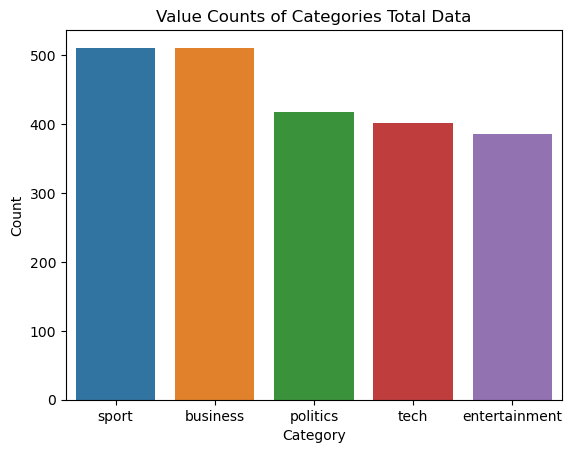

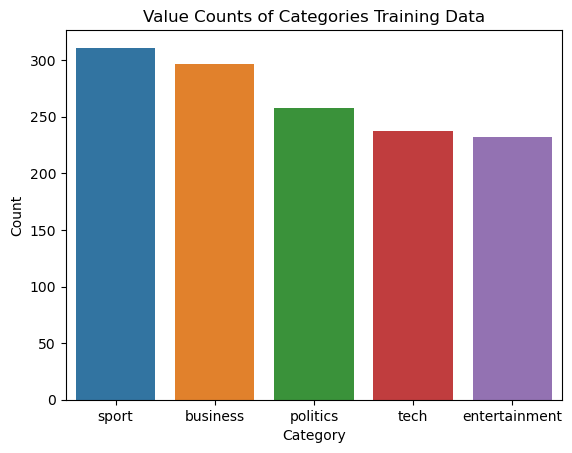

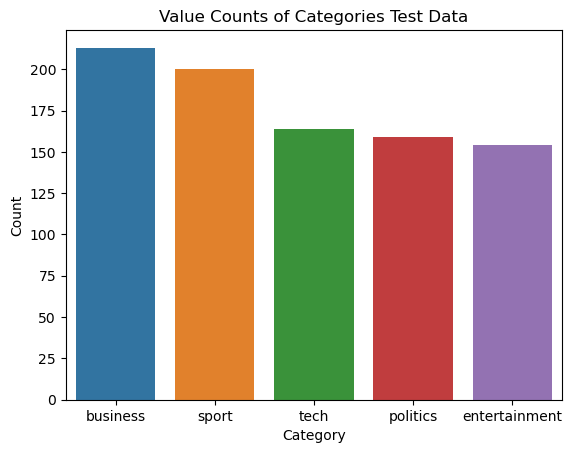

Missing Value Count :
Category    0
Id          0
title       0
Content     0
dtype: int64

Mean word count:
business: 324.34313725490193
entertainment: 325.96891191709847
politics: 449.84892086330933
sport: 325.2172211350294
tech: 498.2942643391521


In [22]:
EDA(data, training_data, testing_data)

In [13]:
data['Content'] = data['Content'].apply(preprocess)

In [14]:
training_data, testing_data = train_test_split(data, test_size=0.4, random_state=42)

 Dataframe of the entire data= 
 <bound method NDFrame.head of       Category   Id                              title  \
0     business    1  Ad sales boost Time Warner profit   
1     business    2   Dollar gains on Greenspan speech   
2     business    3  Yukos unit buyer faces loan claim   
3     business    4  High fuel prices hit BA's profits   
4     business    5  Pernod takeover talk lifts Domecq   
...        ...  ...                                ...   
2220      tech  397   BT program to beat dialler scams   
2221      tech  398    Spam e-mails tempt net shoppers   
2222      tech  399            Be careful how you code   
2223      tech  400    US cyber security chief resigns   
2224      tech  401   Losing yourself in online gaming   

                                                Content  
0     quarterly profit u medium giant timewarner jum...  
1     dollar hit highest level euro almost three mon...  
2     owner embattled russian oil giant yukos ask bu...  
3     br

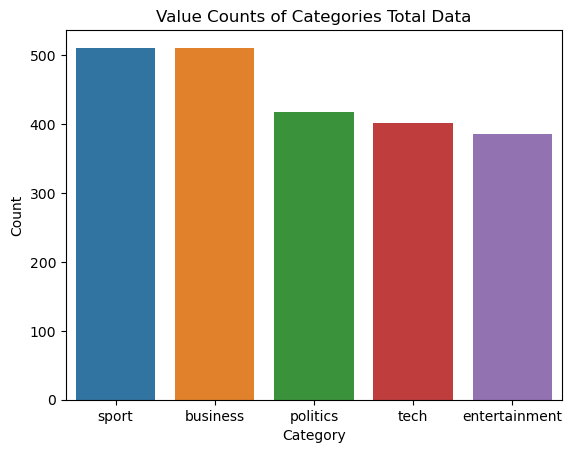

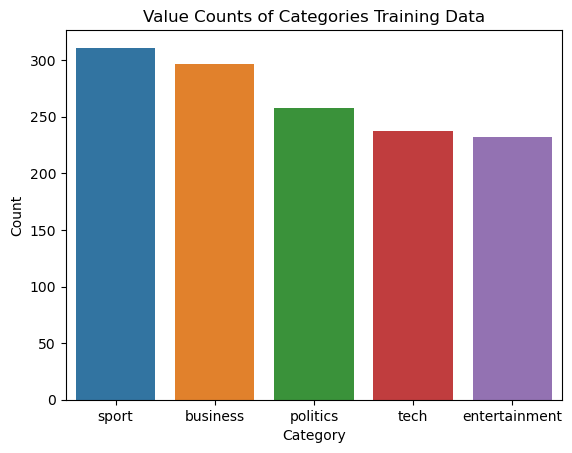

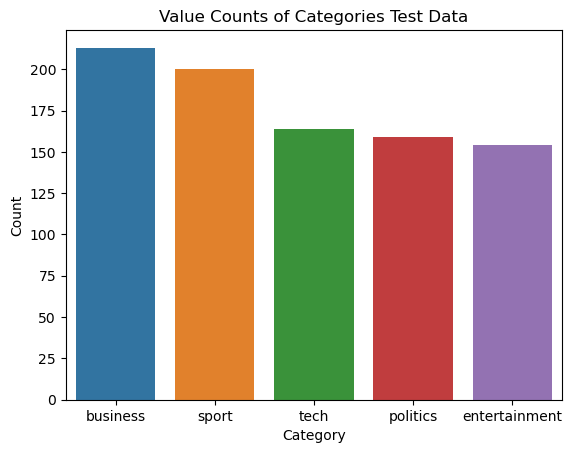

Missing Value Count :
Category    0
Id          0
title       0
Content     0
dtype: int64

Mean word count:
business: 188.75882352941176
entertainment: 186.83678756476684
politics: 248.94004796163068
sport: 178.16046966731898
tech: 282.1172069825436


In [15]:
# Call EDA function post processing         
EDA(data, training_data, testing_data)

In [16]:
vectorizer = TfidfVectorizer(stop_words='english')

In [17]:
results = building_results(vectorizer, training_data, testing_data)

{'accuracy': 0.9393258426966292, 'Precision': 0.9405689595906287}
{'accuracy': 0.9775280898876404, 'Precision': 0.9784881277716613}
{'accuracy': 0.9775280898876404, 'Precision': 0.9775079390061823}
{'accuracy': 0.8078651685393259, 'Precision': 0.8089782697851354}


In [18]:
save_best_model(results)

Best Model: Logistic Regression


In [19]:
best_trained_model = load_best_model()

In [20]:
user_interaction(best_trained_model, vectorizer, data)

Enter some text: Neeraj Chopra on why youngsters should opt for patience and process over shortcuts to fleeting success, his favourite fast bowler, why he likes anonymity when not competing and his need to speak up for fellow athletes. This Idea Exchange was moderated by Associate Editor Nihal Koshie.  Nihal Koshie: This year, you celebrated Diwali with your family. Were there cheat meals? Neeraj Chopra: It was very good to spend Diwali with the family. Cousins studying in Dehradun had come down. We are never together. But this year we had meals together, spent hours chatting. It was free time spent with family after many years. Usually, the family sleeps by 8-9 pm. I would keep them awake till midnight. So they were a little hassled, but it was fun.  I’ve controlled a lot this time (eating sweets). Last time, I was eating everything and my weight had increased. Now, I can control a lot even if I’m not training. If I eat a bit more in one meal, I ensure I skip the next. I’m also traini

# Result Inference
We are evaluating various classifiers like K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), and Decision Tree on a BBC news dataset

The following is interpretation after the EDA:

Data Loading and Splitting:

The code reads data from a CSV file and splits it into training and testing sets using train_test_split from Scikit-Learn. A TfidfVectorizer is employed to convert text data into numerical features.

Model Evaluation Functions:

For each classifier (KNN, Logistic Regression, SVM, Decision Tree), there's a function defined:

The functions preprocess the data, fit the respective model, make predictions, and calculate accuracy and precision scores.

The KNN classifier evaluates accuracy and precision scores.

The Logistic Regression function calculates accuracy and macro-averaged precision scores.

The SVM function appears to have a mismatch in using the vectorizer, causing dimensionality errors.

The Decision Tree classifier computes accuracy and weighted precision scores.

Model Selection and Persistence:

After evaluating each model, we are selecting the best model based on accuracy and saves it using pickle.

User Interaction Loop:

It allows the user to input text, the model predicts its category, and the user can correct it if wrong.

If the user provides a correction, the model retrains using the new data and updates the best model accordingly.

For KNN, logistic regression, SVM, Decision Tree the accuracy after initial train and test splits are :

KNN: accuracy- 0.9405162738496072, Precision - 0.941681851387967

logistic regression: accuracy- 0.9730639730639731, Precision- 0.9736079992320874

SVM: accuracy- 0.9775533108866442, Precision- 0.9775561917792899

Decision Tree: accuracy- 0.8170594837261503, Precision-  0.8184577254021699


After user inputs if the category that the model classified is wrong, user can enter which category the content belongs to and then the model will gets trained and then outputs the category. We see increase in precision and accuracy as we keep doing this.

# Real World Implications
1. News Categorization and Recommendation Systems:
Media companies can deploy these models to categorize news articles automatically into sections like politics, sports, business, etc. Implication: Enhancing user experience by suggesting related articles based on categorized content, improving content organization, and optimizing search functionality.

2. Customer Support Ticket Classification:
Companies with large customer support systems can use these models to categorize incoming support tickets based on user queries. Implication: Streamlining customer service operations by directing tickets to relevant departments or agents, reducing response times, and improving customer satisfaction.

3. Sentiment Analysis for Social Media Monitoring:
Social media platforms can use sentiment analysis techniques, similar to text classification, to categorize user comments or posts into positive, negative, or neutral sentiments. Real-world implication: Assists in brand monitoring, identifying trends, and gauging public sentiment towards products or services.

​